# Stacking

Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features.

The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous. The algorithm below summarizes stacking.

![title](./algo.png)

![title](./stacking.png)

The following accuracy is visualized in the top right plot of the figure above:

Accuracy: 0.91 (+/- 0.01) [KNN]

Accuracy: 0.91 (+/- 0.06) [Random Forest]

Accuracy: 0.92 (+/- 0.03) [Naive Bayes]

Accuracy: 0.95 (+/- 0.03) [Stacking Classifier]

The stacking ensemble is illustrated in the figure above. It consists of k-NN, Random Forest, and Naive Bayes base classifiers whose predictions are combined by Logistic Regression as a meta-classifier. We can see the blending of decision boundaries achieved by the stacking classifier. The figure also shows that stacking achieves higher accuracy than individual classifiers and based on learning curves, it shows no signs of overfitting.

Finally it is important to mention that stacking is a commonly used technique for winning the Kaggle data science competition.

#### Now we will see how we came to this conclusions.

In [1]:
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [3]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [StackingClassifier]


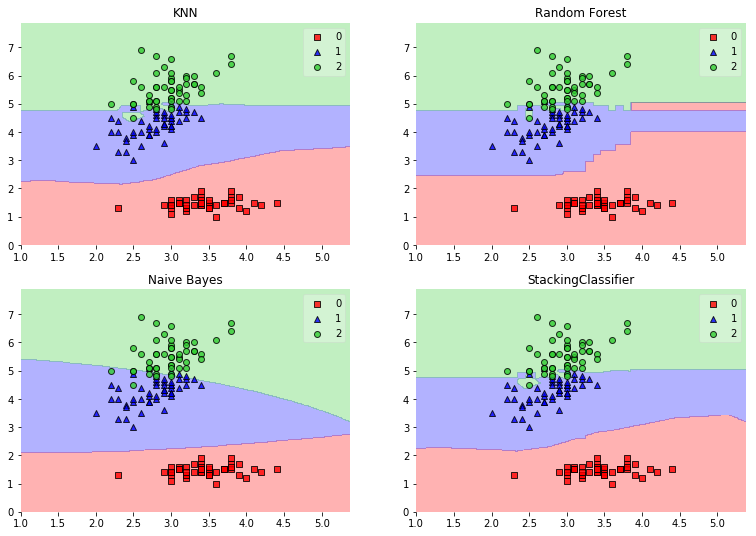

In [4]:
%matplotlib inline
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(13,9))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

#### something extra to add 

Below i use the code from Indra to test bagging.

In [5]:
#Recover Churn data
df = pd.read_csv("./churn_curated_numerical.csv",header=None)
df.head()
data = df.values
X = data[:,:-1]
y = 2*data[:,-1]-1
print ('Loading ok.')

Loading ok.


In [6]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
scores = cross_val_score(clf, X, y)
scores.mean()

0.90969096909690972

In [7]:
clf =BaggingClassifier(tree.DecisionTreeClassifier(random_state=0) ,n_estimators=200)
clf.fit(X, y)
scores = cross_val_score(clf, X, y)
scores.mean()

0.9486948694869487

As we can see there is an increase of about 4%! 